# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Learning Points & Summary

Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

* Use nested loops to remove unwanted characters from multiple columns

* Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

* Create bubble charts using the Seaborn Library

* Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

* Use floor division (i.e., integer division) to convert years to decades

* Use Seaborn to superimpose a linear regressions over our data

* Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

* Run regressions with scikit-learn and calculate the coefficients.


**Today you'll learn:**

* How to use a popular data visualisation library called Seaborn

* How to run and interpret a linear regression with scikit-learn

* How to plot a regression a scatter plot to visualise relationships in the data

* How to add a third dimension to a scatter plot to create a bubble chart

* How to cleverly use floor division // to convert your data

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/jupyter/data/78/cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
print(data.shape)
print(f'Any nan values: {data.isna().values.any()}')
print(f'Any duplicate rows: {data.duplicated().values.any()}')
print(f'Number of duplicate rows: {len(data[data.duplicated()])}')
print(data.info())

(5391, 6)
Any nan values: False
Any duplicate rows: False
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1763,4576,2/8/2002,Full Frontal,"$2,000,000","$3,438,804","$2,512,846"
1106,5019,6/19/1998,Hav Plenty,"$650,000","$2,301,777","$2,301,777"
2015,2832,4/18/2003,Malibu's Most Wanted,"$15,000,000","$34,499,204","$34,308,901"
7,5141,1/2/1929,The Broadway Melody,"$379,000","$4,358,000","$2,800,000"
4668,683,9/5/2014,Legends of Oz: Dorothy’s Return,"$70,000,000","$20,107,933","$8,462,347"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for column in columns_to_clean:
  for character in chars_to_remove:
    # replace each character with an empty string
    data[column] = data[column].astype(str).str.replace(character, '')

  # convert column into a numeric data type
  data[column] = pd.to_numeric(data[column])

<ipython-input-11-e2b646cef31b>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[column] = data[column].astype(str).str.replace(character, '')


In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2508,1678,9/23/2005,A History of Violence,32000000,61477797,31493782
2905,5075,5/10/2007,Finishing the Game,500000,53201,52850
4580,4822,3/21/2014,God’s Not Dead,1150000,63777092,60755732
3220,2352,9/19/2008,Lakeview Terrace,20000000,44821299,39263506
2184,3298,2/20/2004,The Blue Butterfly,10400000,1610194,1610194


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions (.query() or .loc[bitwise operation])

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)?

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.

However, we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses () around the comparisons we'd like to prioritise.

In [ ]:
# one way to create two conditions for selecting data in a dataframe (.loc)
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]

international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas! Here's an example:

In [ ]:
# example of bit wise operator on pandas and why it works (uses numpy behind the scenes)
a = np.array([True, False, True, True])
b = np.array([False, True, False, True])
# bitwise and
print(a & b)


[False False False  True]


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
import numpy as np


In [ ]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
# compare timestamps
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleases movies: {len(future_releases)}')
future_releases

Number of unreleases movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
# drop unreleased movies
data_clean = data.drop(future_releases.index)

In [ ]:
try:
  data_clean.loc[5384]
except:
  print("Key doesn't exist. Meaning, it was dropped")

Key doesn't exist. Meaning, it was dropped


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


### Budget Greater than Revenue

In [ ]:
# first way to calculate using .loc
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]

# percentage of movies that are unprofitable
print(f'Unprofitable movies: {len(money_losing)/len(data_clean) * 100}%')

Unprofitable movies: 37.27711738484398%


In [ ]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

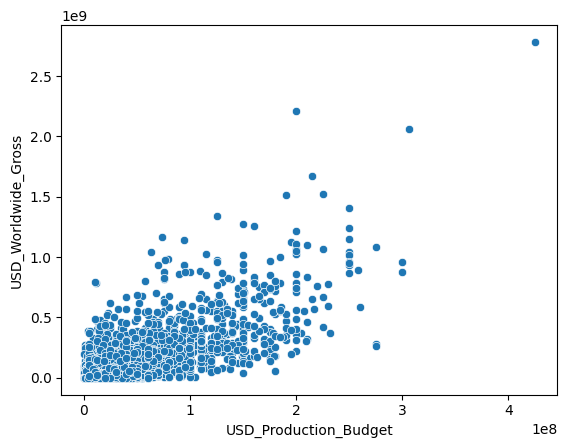

In [ ]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

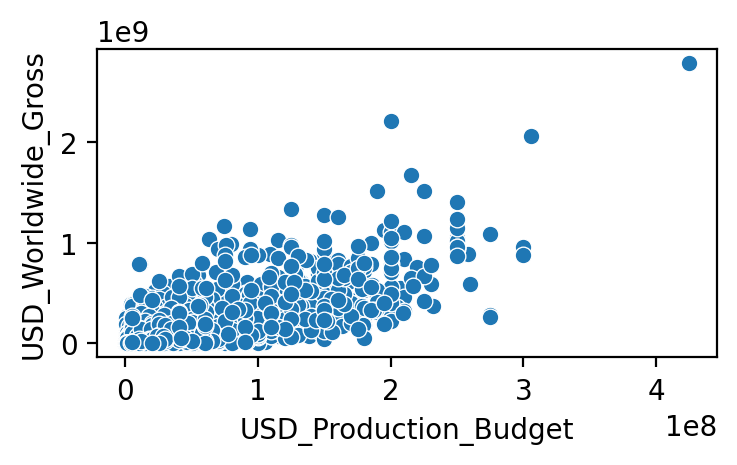

In [ ]:
# seaborn is built on top of matplotlib
plt.figure(figsize=(4,2), dpi=200)
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
plt.show()

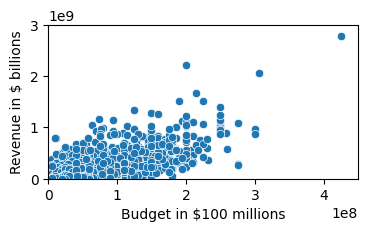

In [ ]:
plt.figure(figsize=(4,2), dpi=100)

ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget',
                         y='USD_Worldwide_Gross')

# basically removes the white from the 0
ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')

plt.show()

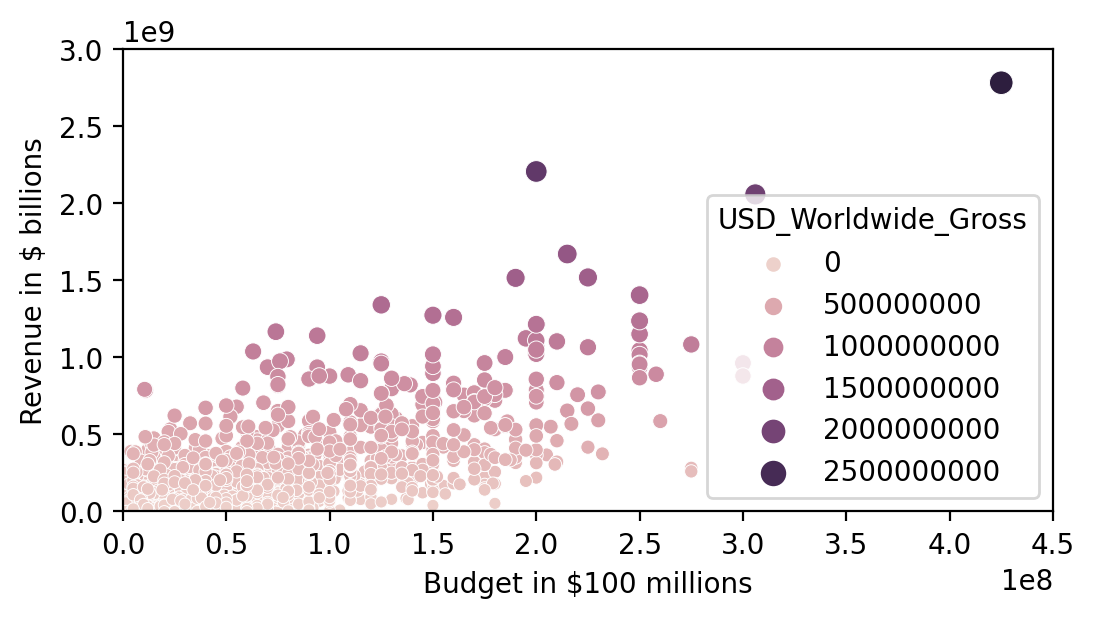

In [ ]:
# seaborn allows us to do a bubble chart from a scatter plot using the 'hue', 'size' params
plt.figure(figsize=(6,3), dpi=200)
ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget',
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)
plt.show()

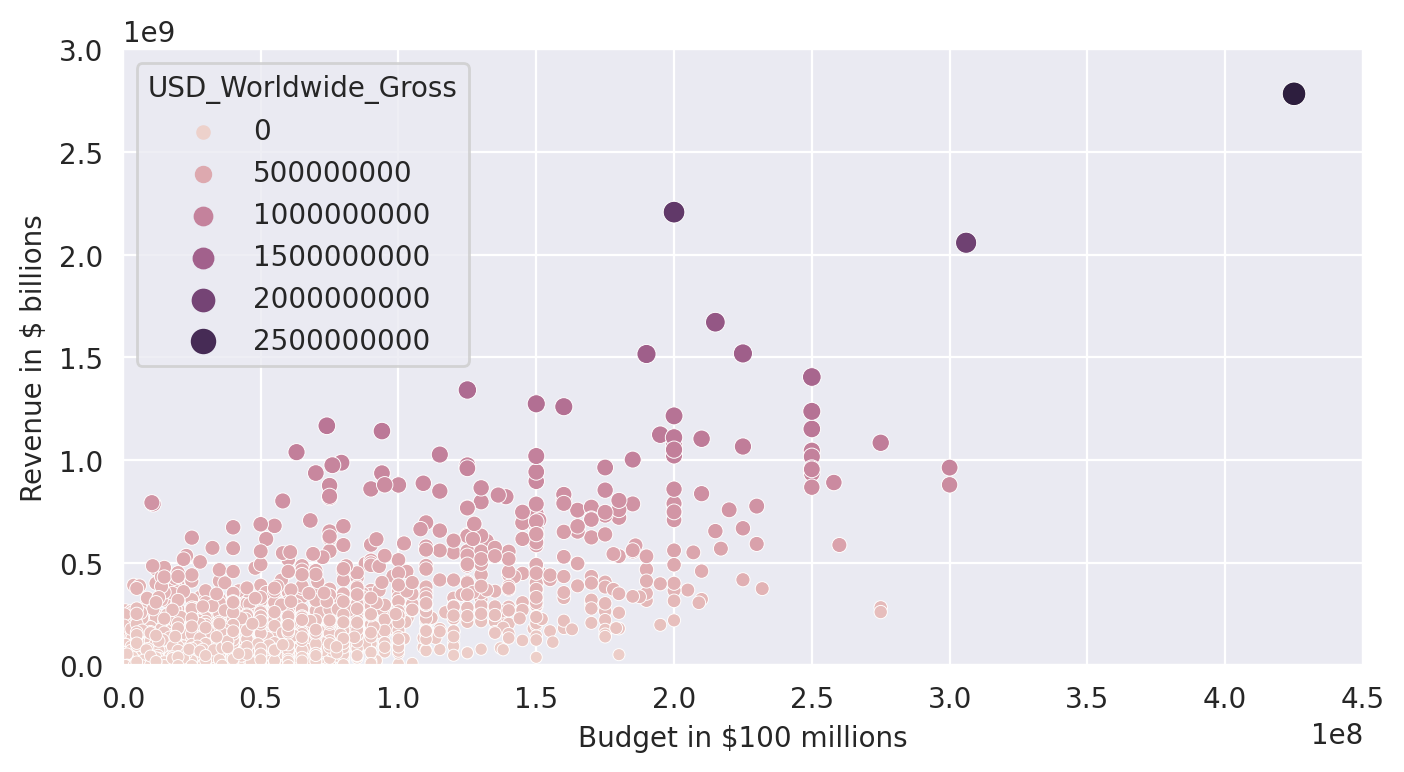

In [ ]:
"""To set the styling on a single chart (as opposed to all charts in the entire notebook)
we can use Python's with keyword"""
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
# themes = https://python-graph-gallery.com/104-seaborn-themes/
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

Explore `Seaborn Themes` here: https://python-graph-gallery.com/104-seaborn-themes/

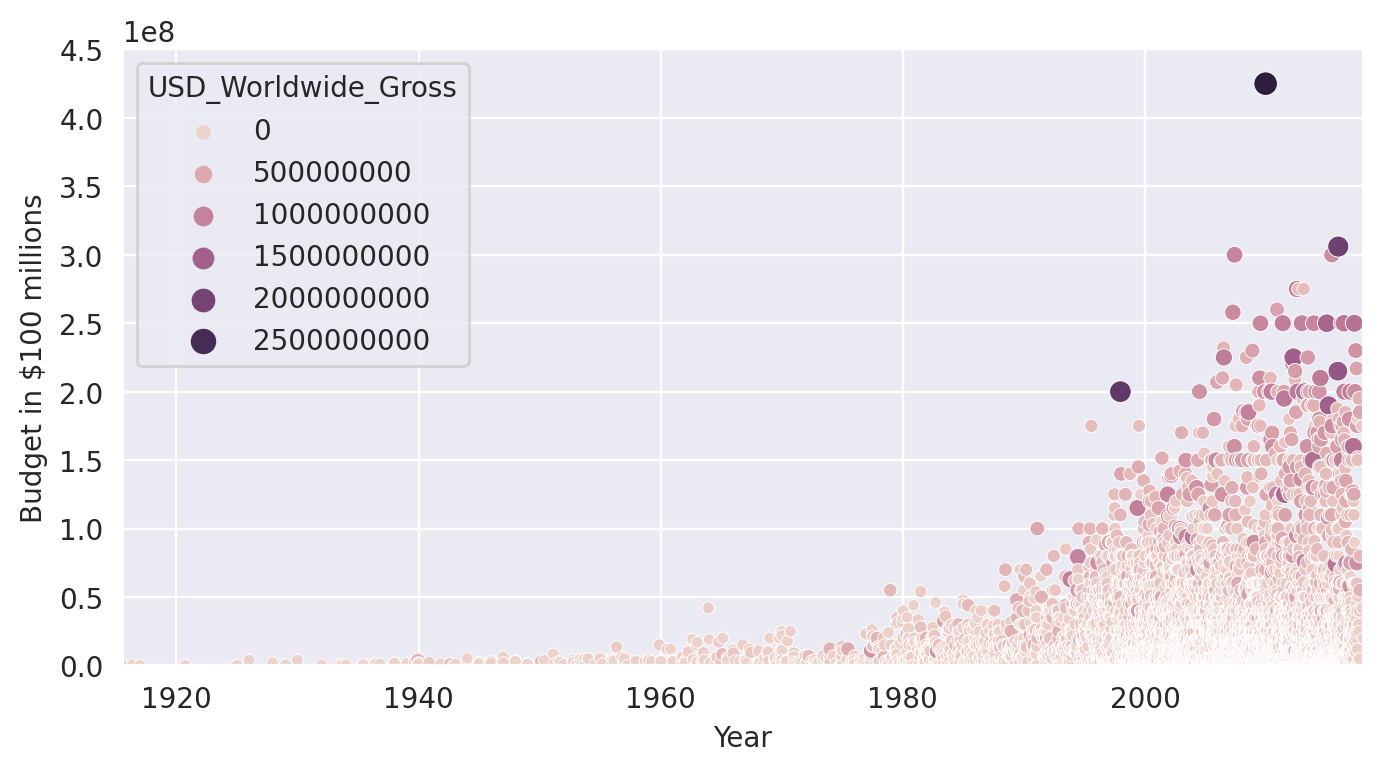

In [ ]:
"""This chart tells us how the budget has exploded as time has gone by.
Also, the number of movies has increased rapidly, producing more movies
(as shown with the number of bubbles)"""
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
# create a DatetimeIndex object using the .year property
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
print(years)

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


In [ ]:
# convert years to decades using floor division (trick)
years[0] // 10 * 10   # this removes the last digit and then converts it to 0

1910

In [ ]:
decades = years // 10 * 10
# data_clean.Decade = decades     # not recommended (property access)
data_clean.insert(len(data_clean.columns), column='Decade', value=decades)  # first param is where to insert the column (what column index)
data_clean

ValueError: cannot insert Decade, already exists

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [ ]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [ ]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


In [ ]:
old_films.sort_values('USD_Worldwide_Gross', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
23,4248,1939-12-15,Gone with the Wind,3900000,390525192,198680470,1930
117,3594,1965-02-03,The Sound of Music,8200000,286214286,163214286,1960
28,4969,1942-08-13,Bambi,858000,268000000,102797000,1940
46,4434,1950-02-15,Cinderella,2900000,263591415,85000000,1950
18,4756,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925485,184925485,1930


# Seaborn Linear Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

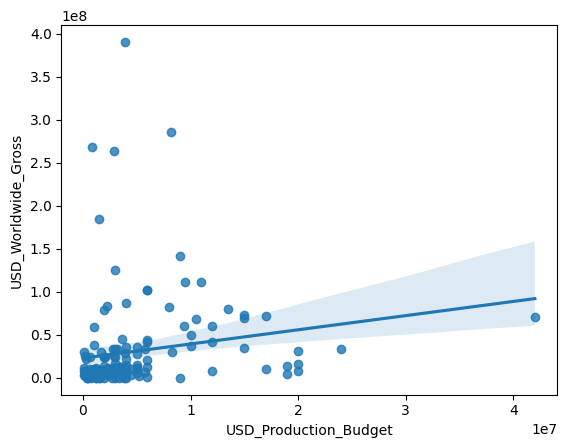

In [ ]:
# relationship between movie budget and worldwide revenue using linear regression (regplot)
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

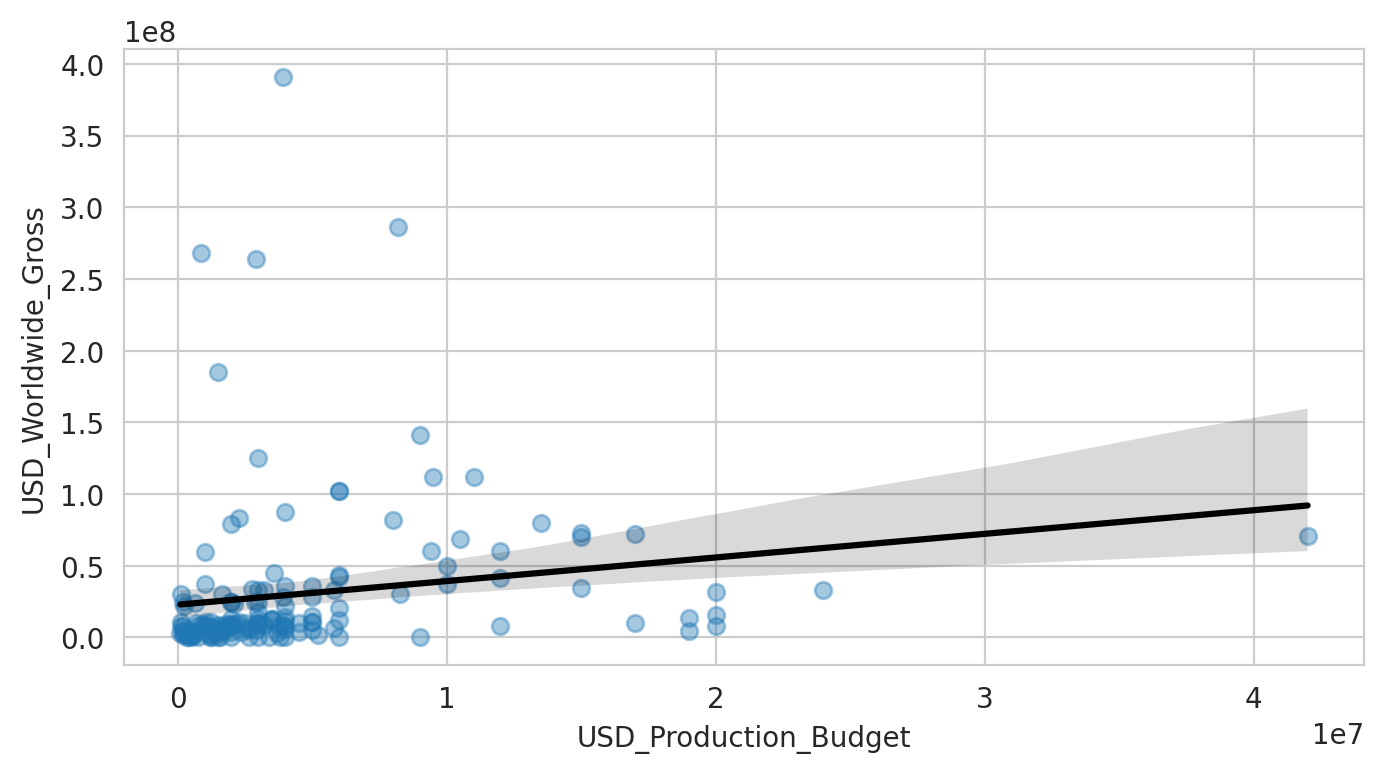

In [ ]:
# to style the chart further, we drop into the matplotlib layer and give it keyword args as dicts
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},   # change transparency of dots (scatter)
            line_kws = {'color': 'black'})  # change color of regression line

**What do we see here?** Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

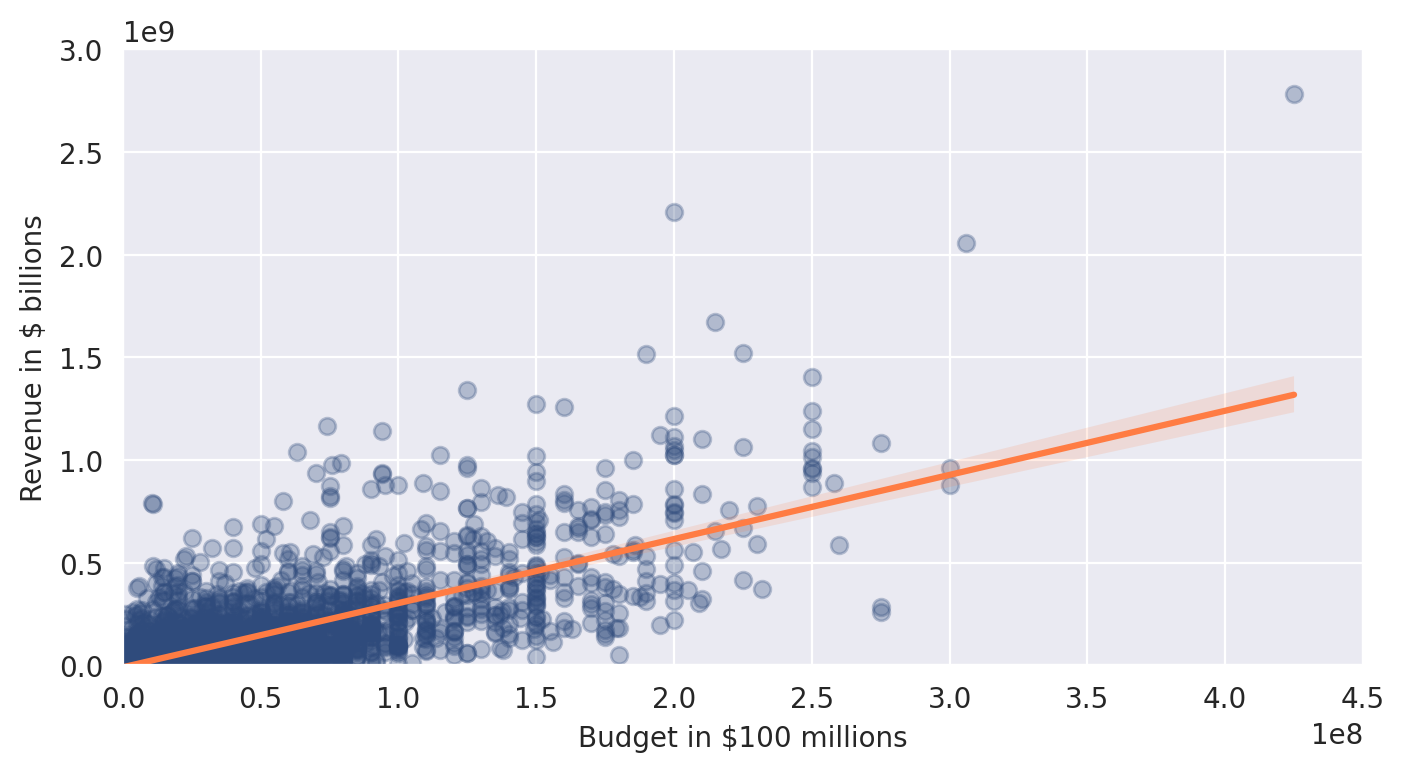

In [ ]:
# plotting a regression on newer films
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

*We get a better fit (linear regression works better) on new films*

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a 150 million budget is predicted to make slightly under 500 million by our regression line.

<br>

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

Same as y = mx + b

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

### Univariate Regression

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues

In [ ]:
from PIL import Image

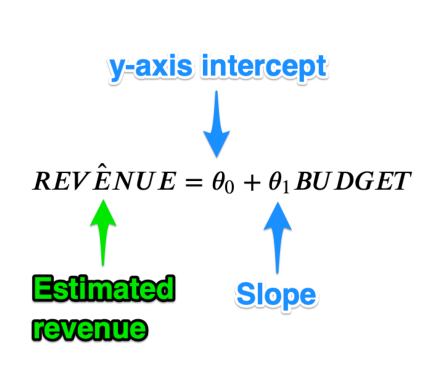

In [ ]:
# prompt: plot an image from the google drive given the path to the image
img = Image.open('/content/drive/MyDrive/jupyter/data/78/linear-regression.png')
plt.axis('off')
plt.imshow(img)


**The slope -- tells us how much extra revenue we get for a $1 increase in budget (x)**
<br>
**Intercept -- tells us how much revenue a movie would make if the x (budget) was 0**

### Run the Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [83]:
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


In [104]:
regression = LinearRegression()

In [105]:
# explanatory variables or features (x1, x2, x3, ...), just x for a univariate regression though
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# response variable or target (output label)
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [106]:
print(X.shape)
print(X.head())

(5231, 1)
     USD_Production_Budget
153               25000000
154               22000000
155               12000000
156               11000000
157                3500000


In [107]:
# LinearRegression doesn't like receiving a Pandas Series as input, but prefers DataFrames
# find the best fit line
regression.fit(X, y)

LinearRegression()

In [108]:
"""Get variables from linear regression"""
# intercept (b)
print(f'Intercept (b): {regression.intercept_}')
# slope (m)
print(f'Slope (m): {regression.coef_}')

Intercept (b): [-8650768.00661027]
Slope (m): [[3.12259592]]


### R-Squared: Goodness of Fit

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

    # R-squared
    regression.score(X, y)

We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable.

**The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.**


In [109]:
# r-squared
regression.score(X, y)

0.5577032617720403

### A bad fit example (old-movies)

In [111]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The slope (m): {regression.coef_[0]}')
print(f'The intercept (b): {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope (m): [1.64771314]
The intercept (b): 22821538.635080386
The r-squared is: 0.02937258620576877


In [ ]:
# this model only explains 3% of the dataset. It is terrible

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [113]:
# calculate revenue from 350 million budget
budget = 35000000
revenue_estimate = regression.coef_[0,0] * budget + regression.intercept_[0]
revenue_estimate = round(revenue_estimate)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.1f}')

The estimated revenue for a $350 film is around $80491499.0


(The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output)

# Learning Points & Summary

Today was a pretty packed lesson where we introduced a lot of new concepts. In this lesson we looked at how to:

    Use nested loops to remove unwanted characters from multiple columns

    Filter Pandas DataFrames based on multiple conditions using both .loc[] and .query()

    Create bubble charts using the Seaborn Library

    Style Seaborn charts using the pre-built styles and by modifying Matplotlib parameters

    Use floor division (i.e., integer division) to convert years to decades

    Use Seaborn to superimpose a linear regressions over our data

    Make a judgement if our regression is good or bad based on how well the model fits our data and the r-squared metric

    Run regressions with scikit-learn and calculate the coefficients.